In [1]:
pip install networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Create a directed graph
G = nx.DiGraph()


In [4]:
# Add nodes (Machines)
machines = ["M1", "M2", "M3", "M4", "M5"]
G.add_nodes_from(machines)

In [5]:
# Add edges (Process flows) with attributes
edges = [
    ("M1", "M2", {"time": 3, "failure_rate": 0.01}),
    ("M2", "M3", {"time": 5, "failure_rate": 0.02}),
    ("M3", "M4", {"time": 2, "failure_rate": 0.015}),
    ("M4", "M5", {"time": 4, "failure_rate": 0.01}),
    ("M2", "M5", {"time": 7, "failure_rate": 0.03}),
]
G.add_edges_from(edges)

In [6]:
print("Graph Nodes:", G.nodes)
print("Graph Edges:", G.edges(data=True))


Graph Nodes: ['M1', 'M2', 'M3', 'M4', 'M5']
Graph Edges: [('M1', 'M2', {'time': 3, 'failure_rate': 0.01}), ('M2', 'M3', {'time': 5, 'failure_rate': 0.02}), ('M2', 'M5', {'time': 7, 'failure_rate': 0.03}), ('M3', 'M4', {'time': 2, 'failure_rate': 0.015}), ('M4', 'M5', {'time': 4, 'failure_rate': 0.01})]


In [7]:
# Calculate betweenness centrality
centrality = nx.betweenness_centrality(G, weight="time")
print("Betweenness Centrality:", centrality)


Betweenness Centrality: {'M1': 0.0, 'M2': 0.25, 'M3': 0.16666666666666666, 'M4': 0.08333333333333333, 'M5': 0.0}


In [8]:
# Find the shortest path based on processing time
shortest_path = nx.shortest_path(G, source="M1", target="M5", weight="time")
print("Shortest Path:", shortest_path)


Shortest Path: ['M1', 'M2', 'M5']


In [9]:
# Remove a node to simulate machine failure
G.remove_node("M3")

# Find an alternative path
alternative_path = nx.shortest_path(G, source="M1", target="M5", weight="time")
print("Alternative Path After M3 Failure:", alternative_path)


Alternative Path After M3 Failure: ['M1', 'M2', 'M5']


In [10]:
# Convert the directed graph to undirected for MST
mst = nx.minimum_spanning_tree(G.to_undirected(), weight="time")
print("Minimum Spanning Tree Edges:", list(mst.edges(data=True)))


Minimum Spanning Tree Edges: [('M1', 'M2', {'time': 3, 'failure_rate': 0.01}), ('M2', 'M5', {'time': 7, 'failure_rate': 0.03}), ('M4', 'M5', {'time': 4, 'failure_rate': 0.01})]


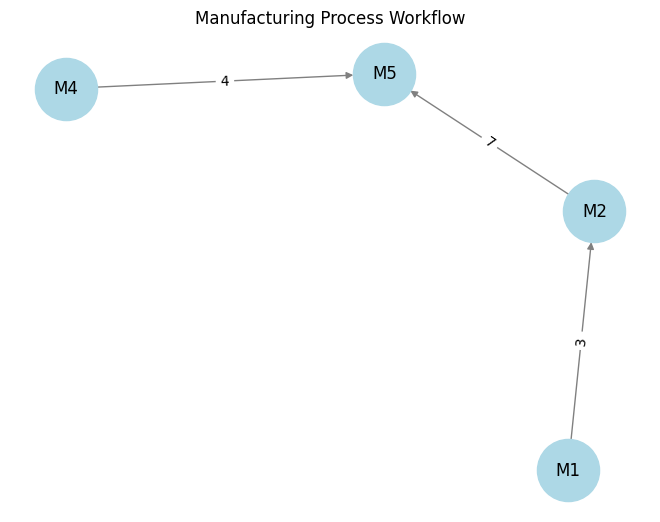

In [11]:
# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000)
edge_labels = nx.get_edge_attributes(G, "time")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Manufacturing Process Workflow")
plt.show()
